**Pontifícia Universidade Católica do Paraná**

**Bacharelado em Ciência da Computação**

**Trabalho de Conclusão de Curso**

Eduardo Klein Nakatani

## K-Nearest Neighbors (KNN)

KNN é um algoritmo de aprendizado supervisionado. Onde os dados são 'treinados' com pontos de dados correspondentes à sua classificação. Uma vez que um ponto deve ser previsto, ele leva em consideração os pontos 'K' mais próximos para determinar sua classificação.

## Bibliotecas e funções
Nessa seção são importadas as bibliotecas e funções que serão utilizadas no decorrer do trabalho.

In [17]:
# Importa bibliotecas necessárias 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.datasets import load_digits

In [37]:
# define algoritmos de avaliação dos resultados
def evaluate(y_test, y_pred):
  return f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

## Base de dados

Nessa seção é feita a importação da base de dados que será utilizada.

In [19]:
## Carrega os dados do arquivo excel 
df = pd.read_excel('../Exploratory data analysis/data/dataset.xlsx')

## Remove as colunas vazias
df.dropna(axis=1, how='all', inplace=True)

## empty values to NaN
#df.replace('NaN', np.nan, inplace=True)

#### Segmentação das colunas

Nessa seção somente as colunas relacionadas a dados obtidos sem a necessidade de apoio médico ou de equipamentos serão utilizadas. As colunas utilizadas são:
* Idade
* Duração do Fluxo Urinário
* IPSS Score
* Alterado (indicativo)

In [20]:
include = [ 'IDADE', 'Duração F','IPSS SCORE TOTAL','Alterado (Q max)']
df = df[include]

In [21]:
## Divisão dos dados entre valores de entrada e saída
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = np.nan_to_num(X)
y = np.nan_to_num(y)

### MinMax Scaler

Nessa seção é feita a normalização dos dados utilizando o MinMax Scaler, mantendo-os entre 0 e 1.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
# Neste exemplo a base de dados digits é composto por 1.797 instâncias (N=1.797), imagens de tamanho 8x8
# e cada instância é representada por um vetor de 64 atributos (M=64), sendo que cada atributo pode ter um valor entre 0 e 16 (valor do pixel)

#X, y = load_digits(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)



Formato de X:  (37, 3)
Formato de y:  (37,)


### Divisão dos dados

Nessa seção os dados são divididos em dados de treino e dados de teste.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Formato de X_train: ", X_train.shape)
print("Formato de y_train: ", y_train.shape)

print("Formato de X_test: ", X_test.shape)
print("Formato de y_test: ", y_test.shape)



Formato de X_train:  (25, 3)
Formato de y_train:  (25,)
Formato de X_test:  (12, 3)
Formato de y_test:  (12,)


### Criação do modelo

Nessa seção é criado o modelo de KNN com 3 vizinhos e é feito o treinamento do modelo.

In [25]:
# Definindo a técnica a ser utilizada
clf = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### Predição

Nessa seção é feita a predição dos dados de teste.

In [26]:
predictions = clf.predict(X_test)

### Resultados

Nessa seção são apresentados os resultados obtidos.

In [27]:
matrix = confusion_matrix(y_test, predictions)

In [38]:
(score, precision, recall) = evaluate(y_test, predictions)

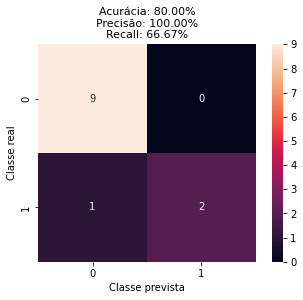

In [40]:
#plotando a matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matrix, annot=True, square = True)

plt.ylabel('Classe real')
plt.xlabel('Classe prevista')

title = 'Acurácia: {:.2f}%'.format(score*100)
title += '\nPrecisão: {:.2f}%'.format(precision*100)
title += '\nRecall: {:.2f}%'.format(recall*100)

plt.title(title, size = 11)

plt.show()